# **The Sparks Foundation**
# **Task #2 - Prediction Using Unsupervised Algorithm**
# by **Manojit Roy**

## Importing the DataFrame


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline 

## Loading the dataset and Creating the DataFrame

In [2]:
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
print(iris_df.shape)
iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Skimming through the datatype and entries-count of the dataset.

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Normalizing the dataset for feature-scaling 

In [4]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = iris_df.columns
iris_df = norm.fit_transform(iris_df)

iris_df = pd.DataFrame(iris_df, columns = columns)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


## Building the model and implementing at various numbers of clusters

In [5]:
from sklearn.cluster import KMeans

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(iris_df)
    SSE.append(kmeans.inertia_)

In [6]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})

## Visualizing the Elbow Plot

Text(0, 0.5, 'Inertia')

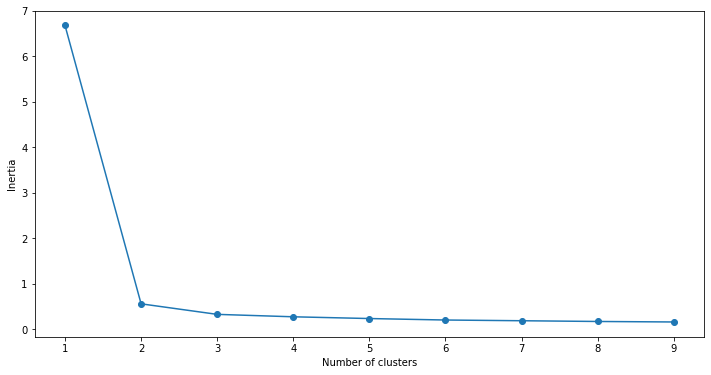

In [7]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

* Obviously, at n_clusters = 2, we've the elbow point i.e. it'll be best if we choose 2 as the total number of clusters!

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(iris_df)
pred=kmeans.predict(iris_df)

## Predicting the classes according to the cluster class.

In [9]:
iris_df['cluster'] = pred
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.803773,0.551609,0.220644,0.031521,1
1,0.828133,0.507020,0.236609,0.033801,1
2,0.805333,0.548312,0.222752,0.034269,1
3,0.800030,0.539151,0.260879,0.034784,1
4,0.790965,0.569495,0.221470,0.031639,1


## Observing the classfication done by our model

In [10]:
iris_df['cluster'].value_counts(normalize=True)

0    0.666667
1    0.333333
Name: cluster, dtype: float64

## Visualization of the clusters w.r.t. to the features(taken two at a time)

In [11]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(iris_df[str_x][iris_df['cluster']==i])
    y.append(iris_df[str_y][iris_df['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()

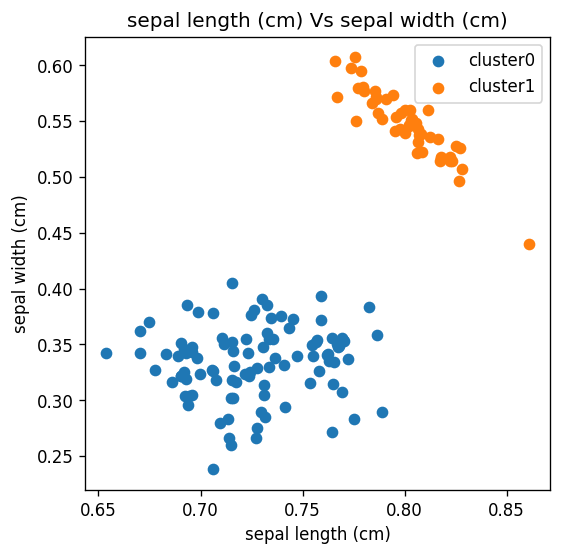

In [12]:
plot_clusters('sepal length (cm)', 'sepal width (cm)', 2)

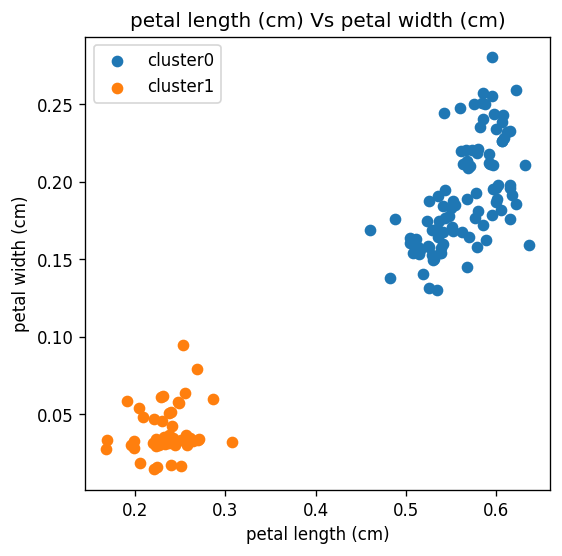

In [13]:
plot_clusters('petal length (cm)', 'petal width (cm)', 2)

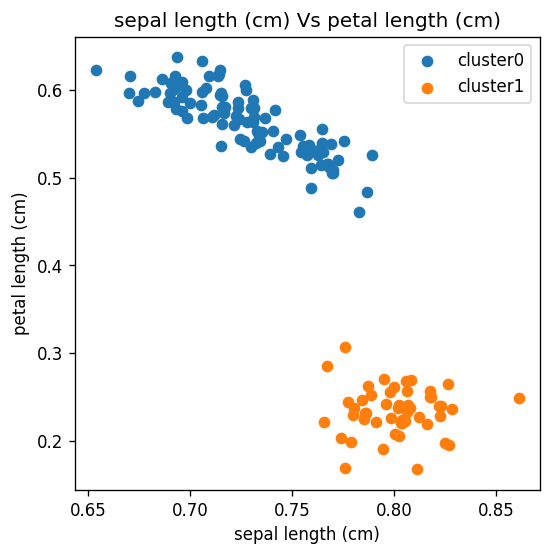

In [14]:
plot_clusters('sepal length (cm)', 'petal length (cm)', 2)

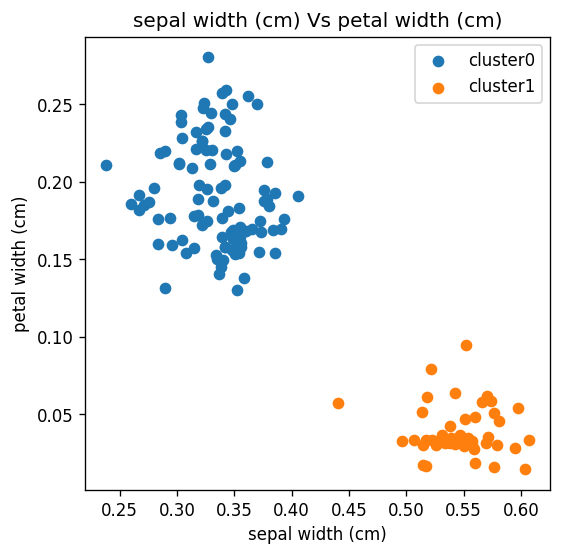

In [15]:
plot_clusters('sepal width (cm)', 'petal width (cm)', 2)

* Obviously, 2 is the optimum number of clusters!